In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#este dataset es de prueba que lo tiene sklearn
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [4]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [5]:
#como es un diccionario solo podemos ver lo que contiene ese diccionario
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
#como es diccionario, esta es la forma para lograr la descripcion que aparece en el diccionario
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [7]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [8]:
#crear un data frame para poder visualisar esta info o diccionario, aqui creamos un dataset llamado df_feat

df_feat = pd.DataFrame(data=cancer['data'], columns=cancer['feature_names'])
df_feat.info() #esta completo con 30 columnas , el modelo que vamos a tratar ayuda porque trabaja con data de grande dimenciones, recuerda que nuestra variable objetivo es target

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
#es un array de 0 y 1, osea resultados binarios 
cancer['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [10]:
#para convertirlo en un data frame, con lo que vamos a trabajar
df_target = pd.DataFrame(data=cancer['target'], columns=['Cancer'])


In [39]:
#un data frame creado de una solo columna, vizualizarlo con el head
df_target.head()

,Cancer
0,0
1,0
2,0
3,0
4,0


In [12]:
#ahora concatenamos las variables predictoras con la variable objetivo, recuerda que esto se hace con pd o 'Pandas'
#tiene que ponerle siempre axis=1 porque es columnsas y axis=0 es para filas.
df = pd.concat([df_feat,df_target],axis=1)

In [13]:
#esto tiene 31 columnas aqui se ven todas las variables y como lo hemos creado bonito, al final esto es lo que determina si es cancer o no
# esto es ingenieria de variables recuerda
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### Esto lo hare yo para saber las correlaciones copiado de mi otro curso, aprende Johnny Flow, usar todas las herramientas

<AxesSubplot:>

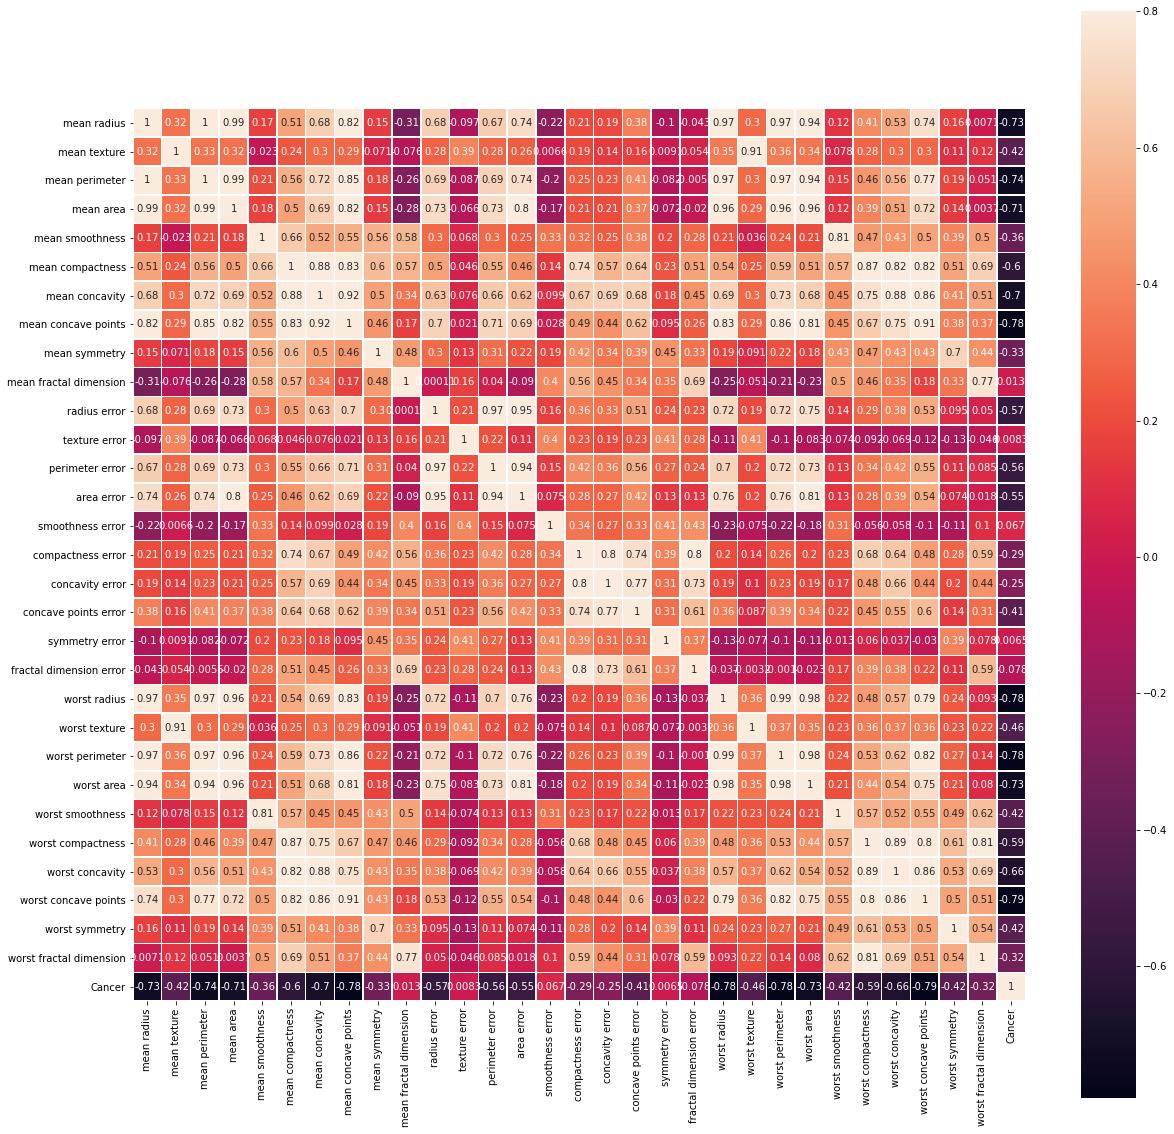

In [14]:
#esto lo hare yo para saber las correlaciones copiado de mi otro curso, aprende Johnny Flow, usar todas las herramientas
corr = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, vmax=.8, 
            linewidths=0.5,
            square=True,
            annot=True)

# Maquinas de Vectores de Soporte 


In [15]:
#no vamos hacer mucha exploracion ni graficos, porque no conocemos el area medica, si fuera medico si lo entendiera
# pero ahora vamos a dividir la data en las predictoras y objetivo (X,y)

In [16]:
X = df.drop('Cancer',axis=1)
y = df['Cancer']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split( X, 
                                                     y, 
                                                     test_size=0.3,
                                                     random_state=42)

In [19]:
#este cambia de suport vector machine pero uno de clasificacion a SVC por el clasify
from sklearn.svm import SVC

In [20]:
#modelo sera SVC
model = SVC()

In [21]:
#entrenar el modelo, con fit(X_train,y_train) te imprimira el modelo
model.fit(X_train,y_train)

SVC()

In [43]:
model.score(X_train,y_train)

0.8994974874371859

In [44]:
# predigo con mi X de prueba, predecir con X de pruebas
predictions = model.predict(X_test)

In [45]:
# para evualuar usamos lo que me clasifica y la confucion
from sklearn.metrics import classification_report, confusion_matrix

In [46]:
#predijo que si tienen cancer son 52, 108 que no tienen , 11 que dijo que no y si tenian cancer ,estaba erroneo, el supo diferenciar el que si tenian cancer pero que no lo tenian. 
# el modelo " no se inventa los canceres " Cero "0" que lo tiene Uno "1" que no lo tiene
print(confusion_matrix(y_test,predictions))

[[ 52  11]
 [  0 108]]


In [26]:
# tuvo una presicion de un 100% de las personas que habia identificado que tenian cancer 
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.83      0.90        63
           1       0.91      1.00      0.95       108

    accuracy                           0.94       171
   macro avg       0.95      0.91      0.93       171
weighted avg       0.94      0.94      0.93       171



<AxesSubplot:>

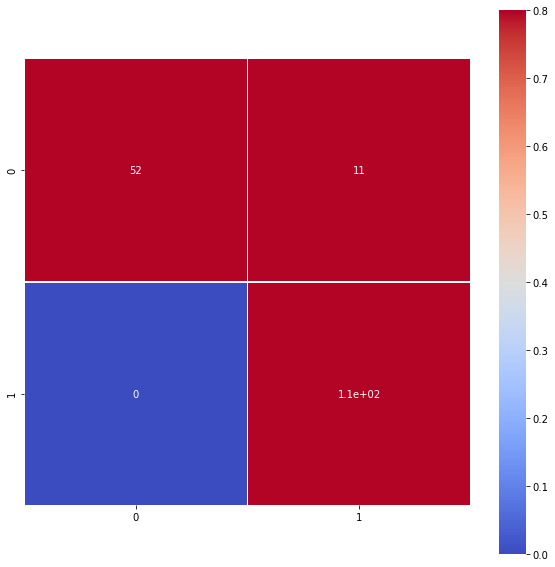

In [25]:
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test,predictions),cmap= 'coolwarm', vmax=.8, linewidths=0.01,
            square=True,annot=True)

In [27]:
#shift y tab, vemos el hiperparametros, el explicar por ejemplo el kernel para mejorar la presicion de la metrica
# por default tiene el rbf tiene que ver como lo mejoras
SVC()

SVC()

In [28]:
diccionario_hiperparametros = {'kernel': ['linear'
                                          ,'poly',
                                          'rbf',
                                          'sigmoid']}

In [29]:
#esto busca unos hiperparametros y dice cual tiene el mejor accuracy o exactitud
from sklearn.model_selection import GridSearchCV

In [30]:
# aqui declara la variable, el verobose es la cantidad de mensajes que el quiere que nos muestre para que analisi
grid = GridSearchCV(SVC(),diccionario_hiperparametros, refit=True, verbose=3)

In [31]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ..................................kernel=linear; total time=   2.4s
[CV 2/5] END ..................................kernel=linear; total time=   0.9s
[CV 3/5] END ..................................kernel=linear; total time=   2.2s
[CV 4/5] END ..................................kernel=linear; total time=   2.5s
[CV 5/5] END ..................................kernel=linear; total time=   0.9s
[CV 1/5] END ....................................kernel=poly; total time=   0.0s
[CV 2/5] END ....................................kernel=poly; total time=   0.0s
[CV 3/5] END ....................................kernel=poly; total time=   0.0s
[CV 4/5] END ....................................kernel=poly; total time=   0.0s
[CV 5/5] END ....................................kernel=poly; total time=   0.0s
[CV 1/5] END .....................................kernel=rbf; total time=   0.0s
[CV 2/5] END ....................................

GridSearchCV(estimator=SVC(),
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [32]:
grid.best_params_

{'kernel': 'linear'}

In [33]:
grid_predictions = grid.predict(X_test)

In [35]:
# 59 que el predijo que no tenian cancer , 2 de error que dijo que no tenian y si, 106 que si tenian correcatamente
print(confusion_matrix(y_test,grid_predictions))

[[ 59   4]
 [  2 106]]


In [40]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



# Terminado
Leer toda la informacion en los comentarios